# Bibliotecas usadas nos exemplos

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys

ModuleNotFoundError: No module named 'cv2'

# Exemplo de leitura e escrita de imagem

In [15]:
img = cv.imread("macarrao.jpg", cv.IMREAD_GRAYSCALE)
 
if img is None:
  sys.exit("Could not read the image.")
 
cv.imshow("Display window", img)
k = cv.waitKey(0)

if k == ord("s"):
  cv.imwrite("macarrao.pgm", img)
  cv.destroyAllWindows()

# Exemplo de videos

In [2]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
   print("Cannot open camera")
   exit()
kernel = np.ones((5,5),np.uint8)
while True:
  # Capture frame-by-frameq
  ret, frame = cap.read()
 
  # if frame is read correctly ret is True
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  # Our operations on the frame come here
  gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
  # Display the resulting frame
  cv.imshow('frame', gradient)
  if cv.waitKey(1) == ord('q'):
    break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

# Desenha formas e texto numa imagem

In [7]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
 
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
# Draw rectangle
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
# Draw circle
cv.circle(img,(447,63), 63, (0,0,255), -1)
# Draw ellipse
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# Draw polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
# Draw text
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

cv.imshow("Desenhos", img)
k = cv.waitKey(0)

if k == ord("q"):
  cv.destroyAllWindows()

# Mouse como ferramenta de desenho

In [8]:
# mouse callback function
# Draw a blue circle when double click
def draw_circle(event,x,y,flags,param):
   if event == cv.EVENT_LBUTTONDBLCLK:
     cv.circle(img,(x,y),50,(255,0,0),-1)
 
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
 
while(1):
   cv.imshow('image',img)
   if cv.waitKey(20) & 0xFF == 27:
     break
cv.destroyAllWindows()

# Outro exemplo com mouse

In [9]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
 
# mouse callback function
def draw_circle(event,x,y,flags,param):
   global ix,iy,drawing,mode
   if event == cv.EVENT_LBUTTONDOWN:
     drawing = True
     ix,iy = x,y
   elif event == cv.EVENT_MOUSEMOVE:
     if drawing == True:
       if mode == True:
         cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
       else:
         cv.circle(img,(x,y),5,(0,0,255),-1)
   elif event == cv.EVENT_LBUTTONUP:
     drawing = False
     if mode == True:
       cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
     else:
       cv.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
 
while(1):
 cv.imshow('image',img)
 k = cv.waitKey(1) & 0xFF
 if k == ord('m'):
   mode = not mode
 elif k == 27:
   break
 
cv.destroyAllWindows()

# Operações Morfológicas

In [16]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

cv.imshow("Erosion", erosion)
k = cv.waitKey(0)

if k == ord("q"):
  cv.destroyAllWindows()

dilation = cv.dilate(img,kernel,iterations = 1)

cv.imshow("Dilation", dilation)
k = cv.waitKey(0)

if k == ord("q"):
  cv.destroyAllWindows()

# Transformada de Fourier

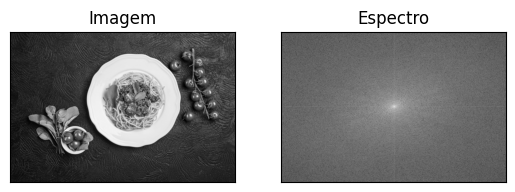

In [4]:
 
img = cv.imread('macarrao.pgm', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro'), plt.xticks([]), plt.yticks([])
plt.show()

# Segmentação usando Watershed

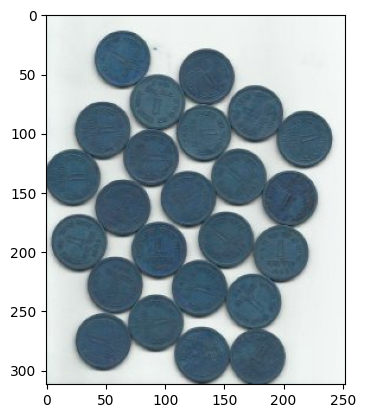

In [7]:
img = cv.imread('moedas.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(img)

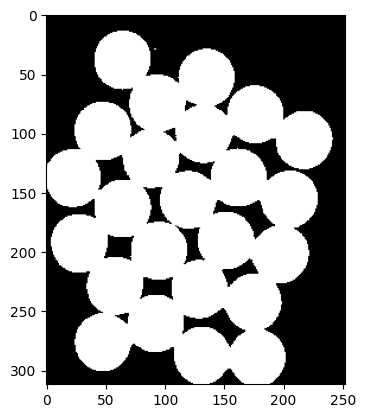

In [8]:
plt.imshow(thresh, cmap='gray')

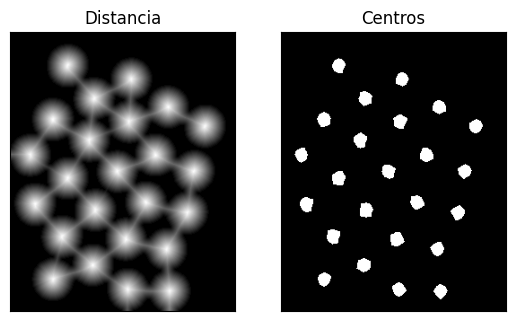

In [9]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

plt.subplot(121),plt.imshow(dist_transform, cmap = 'gray')
plt.title('Distancia'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg, cmap = 'gray')
plt.title('Centros'), plt.xticks([]), plt.yticks([])
plt.show()

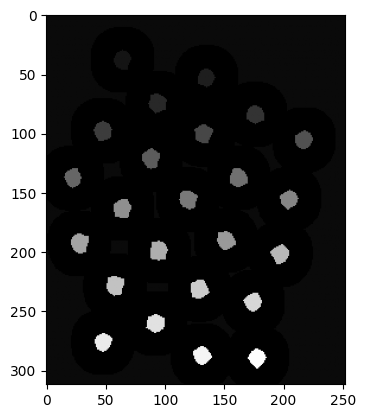

In [10]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers, cmap='gray')

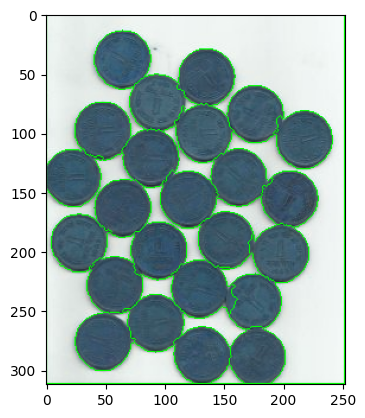

In [11]:
markers = cv.watershed(img,markers)
img[markers == -1] = [0,255,0]

plt.imshow(img, cmap='gray')

# Quantização usando K-means

In [4]:
img = cv.imread('home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(res2,'K={}'.format(K),(10,50), font, 1,(255,255,255),2,cv.LINE_AA)

cv.imshow('Quantization',res2)
cv.waitKey(0)
cv.destroyAllWindows()